In [5]:
import sklearn as sk
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame 

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5, random_state=11)
m = 200

c:\users\shan\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
print(X)

[[  1.01620336  12.35541861]
 [ -2.43164155   6.2602842 ]
 [ -7.58085845 -15.7722262 ]
 [ -7.2850721  -12.48026797]
 [  4.61467535  -9.79582969]
 [-14.12891906  -3.13240225]
 [  0.15018145   7.01152524]
 [ -9.07775303  -8.03348183]
 [ -5.01028979   2.04793082]
 [ -8.35047189  -1.93938342]
 [  4.33950287   8.63548403]
 [ -0.43139441   3.53315569]
 [ -4.67920661  -3.27183191]
 [ -5.01757293  -8.67886847]
 [ -5.30563299   8.14568204]
 [ -5.7964417   12.66458542]
 [  4.87253594   6.78167827]
 [ -1.66526885  -2.34654142]
 [ -9.92167635  -9.84665804]
 [  2.13657619  10.40980472]
 [  1.82505138   6.88810673]
 [ -0.75067487   3.33892437]
 [ -7.38545045   6.70896693]
 [  5.83803719  10.37492642]
 [-14.83100926 -18.09720575]
 [  0.14858429  10.84330616]
 [ -9.04146636  -1.8019767 ]
 [ -5.46628995  -0.44661249]
 [  6.17486415  -2.43061269]
 [  4.93531546   7.47039763]
 [  1.33078776  -5.8404986 ]
 [ -3.82220806  -8.32191326]
 [  0.33228414  -4.53078444]
 [ -7.71631787  -1.89944907]
 [  4.38876591

In [6]:
print(Y)

[1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1
 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0]


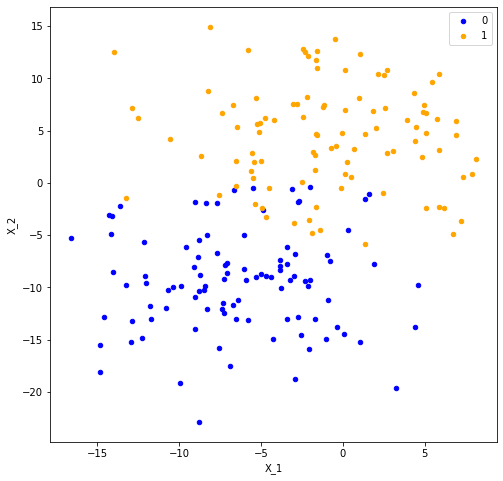

In [7]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots(figsize=(8,8))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

### Lets initialize the parameter first 

In [28]:
def initialize_parameters(dim):    
    w = np.random.randn(dim,1)*0.01
    b = np.zeros((1,1))
    #print(w.shape)
    #print(b.shape)
    return w,b


In [15]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a 

In [16]:
Y = Y.reshape(Y.shape[0],1)

print(Y.shape)
print(X.shape)

(200, 1)
(200, 2)


### calculate predicted value of y 

In [17]:
def y_prediction(X,w,b):
    w,b = initialize_parameters(X.shape[1])
    Z = (np.dot(X,w))+b
    A = sigmoid(Z)
    #print(A)
    return A

### calculate cost function 

In [45]:
def cost_function(X,w,b):
    A = y_prediction(X,w,b)
    L = Y*np.log(A) + (1-Y)*np.log(1-A)
    L = (-1/m)*np.sum(L,axis=0)
    #print(L)
    return L

In [31]:
w,b = initialize_parameters(X.shape
                          [1])
A = y_prediction(X,w,b)

print(A.shape)
print(Y.shape)
print(X.shape)

(200, 1)
(200, 1)
(200, 2)


### Code the gradient descent

In [52]:
def gradient_descent(A,Y,X,w,b,learning_rate):
    dw0 = np.dot((A-Y).T,X[:,0])
    dw1 = np.dot((A-Y).T,X[:,1])
    db = ( A - Y )*1
    j = 0
    while(True):
        print(w)
        w0 = w[0] - learning_rate*dw0
        w1 = w[1] - learning_rate*dw1
        b0 = b - learning_rate*db
        w_new = [w0,w1]
        print(w_new)
        print(cost_function(X,w,b))
        if ( j > 250 ): 
            return w_new, b0

        j = j +1

In [54]:
w,b = initialize_parameters(X.shape[1])
A = y_prediction(X,w,b)
w_new,b0 = gradient_descent(A,Y,X,w,b,0.05)



[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.75055926]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.72672104]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.70402733]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.67829355]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.74466568]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.64624478]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.68021719]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.69516035]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.65381266]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.71157816]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.68192877]
[[0.00911669]
 [0.00233055]]
[array([14.078

[0.64991812]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.77227357]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.69932797]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.65192351]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.64991734]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.68785416]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.73546098]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.74726647]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.68439363]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.65728581]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.68158849]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.67306591]
[[0.00911669]
 [0.00233055]]
[

[0.70865418]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.64352865]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.72357393]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.72020503]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.63849193]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.70585786]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.65960611]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.64094559]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.6844928]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.78308856]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.6394988]
[[0.00911669]
 [0.00233055]]
[array([14.07841828]), array([34.49480652])]
[0.68271147]
[[0.00911669]
 [0.00233055]]
[ar

In [57]:
print(X[:,0].shape)

(200,)


KeyError: "None of [Float64Index([   1.016203364434507,   -2.431641545286383,    -7.58085845119878,\n                -7.285072099026767,    4.614675346556006,  -14.128919060476543,\n               0.15018145149616569,   -9.077753033638267,   -5.010289793195672,\n                 -8.35047188579813,\n              ...\n                -12.17092734654813, -0.08747940855531144,  -13.972952097844432,\n                -8.286718993845323,  -11.702878241406847,  -12.255206395145084,\n               -10.711368803634159,   3.2699209199078263,   -6.737013183976001,\n               -12.039078229030288],\n             dtype='float64', length=200)] are in the [columns]"

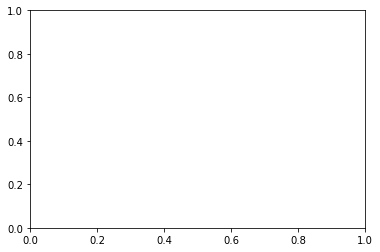

In [59]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w_new[0]-w_new[1]*x)/b0

from matplotlib import pyplot as plt
from pandas import DataFrame 
##df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x= X[:,0], y= X[:,1], label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()